In [ ]:
pip install nltk scikit-learn wordcloud matplotlib seaborn plotly


In [ ]:
# Step 1: Install & Import libraries
!pip install wordcloud

import pandas as pd
import numpy as np
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import files
files.upload()

Saving Tweets.csv to Tweets.csv


{'Tweets.csv': b'tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone\n570306133677760513,neutral,1.0,,,Virgin America,,cairdin,,0,@VirginAmerica What @dhepburn said.,,2015-02-24 11:35:52 -0800,,Eastern Time (US & Canada)\n570301130888122368,positive,0.3486,,0.0,Virgin America,,jnardino,,0,@VirginAmerica plus you\'ve added commercials to the experience... tacky.,,2015-02-24 11:15:59 -0800,,Pacific Time (US & Canada)\n570301083672813571,neutral,0.6837,,,Virgin America,,yvonnalynn,,0,@VirginAmerica I didn\'t today... Must mean I need to take another trip!,,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)\n570301031407624196,negative,1.0,Bad Flight,0.7033,Virgin America,,jnardino,,0,"@VirginAmerica it\'s really aggressive to blast obnoxious ""entertainment"" in your guests\' faces &amp; they have little 

In [ ]:
# Step 2: Load dataset
# Verify the file path is correct based on where you uploaded the file
file_path = '/content/Tweets.csv'  # <-- Update this if needed
df = pd.read_csv(file_path)
df = df[['airline_sentiment', 'text']].dropna()

In [ ]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the required punkt_tab resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Step 3: Text Cleaning
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    filtered = [w for w in tokens if w not in stop_words]
    return " ".join(filtered)

df['clean_text'] = df['text'].apply(clean_text)

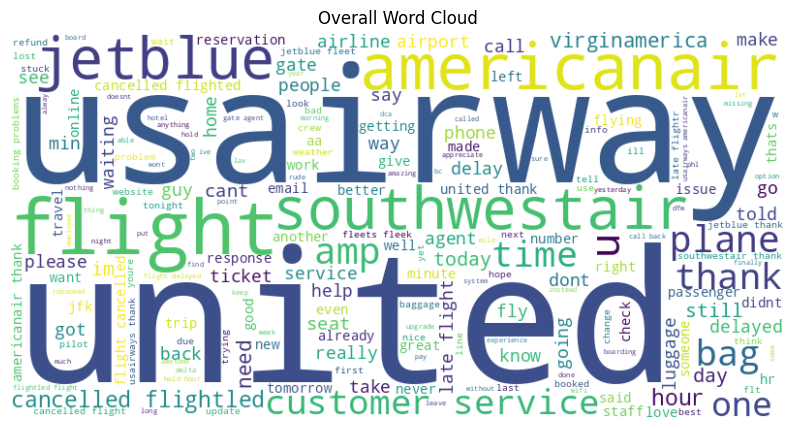

In [ ]:
# Step 4: WordCloud
plt.figure(figsize=(10,6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['clean_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Overall Word Cloud")
plt.show()

<ipython-input-13-29a568859095>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='airline_sentiment', palette='Set2')


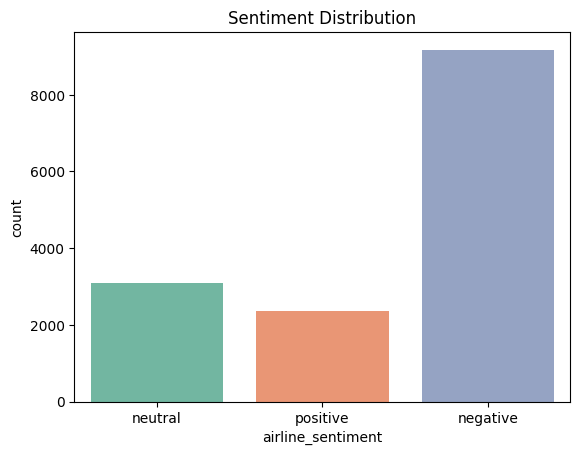

In [ ]:
# Step 5: Visualize sentiment counts
sns.countplot(data=df, x='airline_sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.show()


In [ ]:
# Step 6: Vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['airline_sentiment']

In [ ]:
# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


--- Naive Bayes ---
Accuracy: 0.7588797814207651
Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.98      0.85      1889
     neutral       0.71      0.29      0.42       580
    positive       0.89      0.45      0.59       459

    accuracy                           0.76      2928
   macro avg       0.78      0.57      0.62      2928
weighted avg       0.77      0.76      0.72      2928



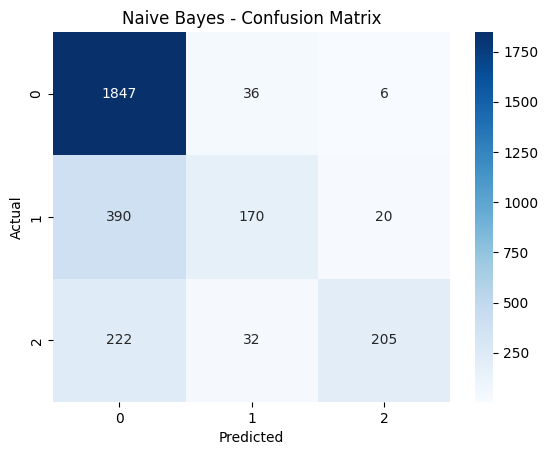


--- Logistic Regression ---
Accuracy: 0.8029371584699454
Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.94      0.88      1889
     neutral       0.69      0.49      0.57       580
    positive       0.80      0.63      0.71       459

    accuracy                           0.80      2928
   macro avg       0.77      0.69      0.72      2928
weighted avg       0.79      0.80      0.79      2928



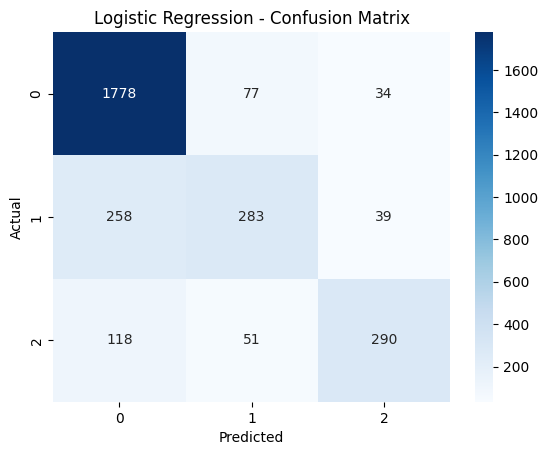


--- Random Forest ---
Accuracy: 0.7667349726775956
Classification Report:
               precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1889
     neutral       0.62      0.39      0.48       580
    positive       0.74      0.57      0.64       459

    accuracy                           0.77      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.77      0.75      2928



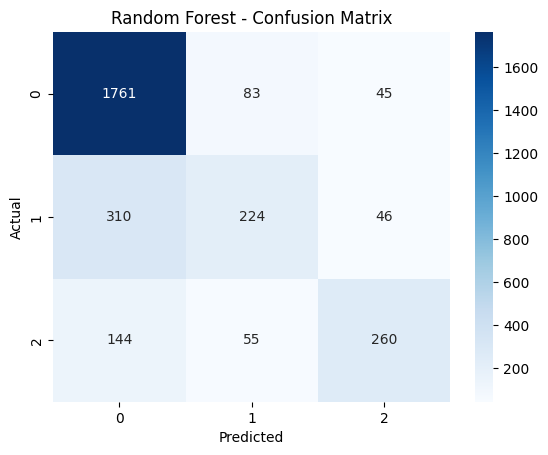

In [ ]:
# Step 8: Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

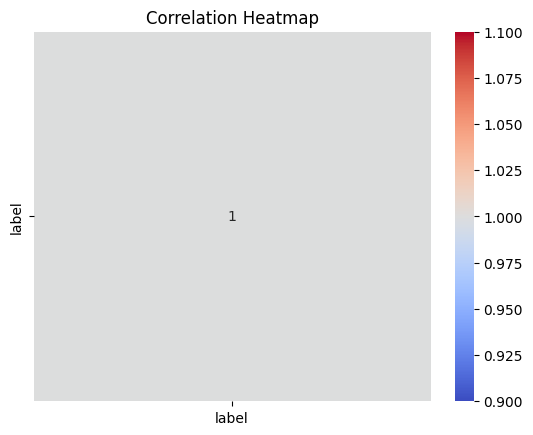

In [ ]:
# Step 9: Correlation heatmap (TF-IDF features are sparse, use sentiment distribution correlation instead)
df['label'] = df['airline_sentiment'].astype('category').cat.codes
correlation = df[['label']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Function to predict sentiment of a new tweet
def predict_sentiment(new_text):
    cleaned = clean_text(new_text)
    vect = tfidf.transform([cleaned]).toarray()
    pred = models["Logistic Regression"].predict(vect)[0]
    return pred

# Example
new_tweet = "I loved the service and the food was excellent!"
print("Tweet:", new_tweet)
print("Predicted Sentiment:", predict_sentiment(new_tweet))


Tweet: I loved the service and the food was excellent!
Predicted Sentiment: positive


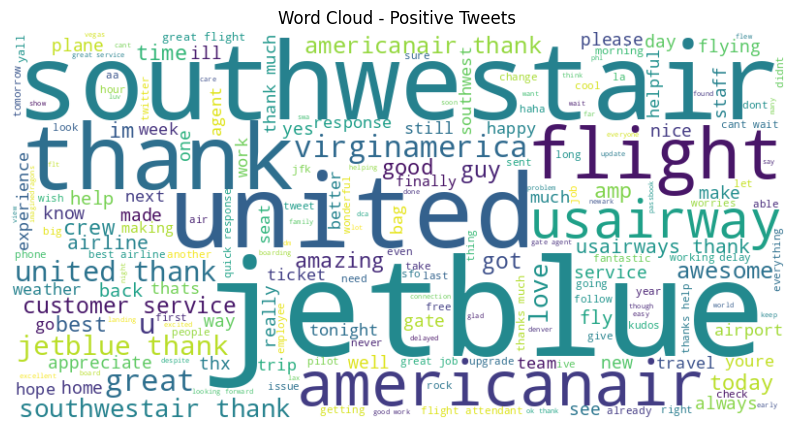

In [ ]:
# Filter positive tweets
positive_tweets = df[df['airline_sentiment'] == 'positive']['clean_text']

# Word cloud for positive sentiment
plt.figure(figsize=(10,6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(positive_tweets))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Positive Tweets")
plt.show()


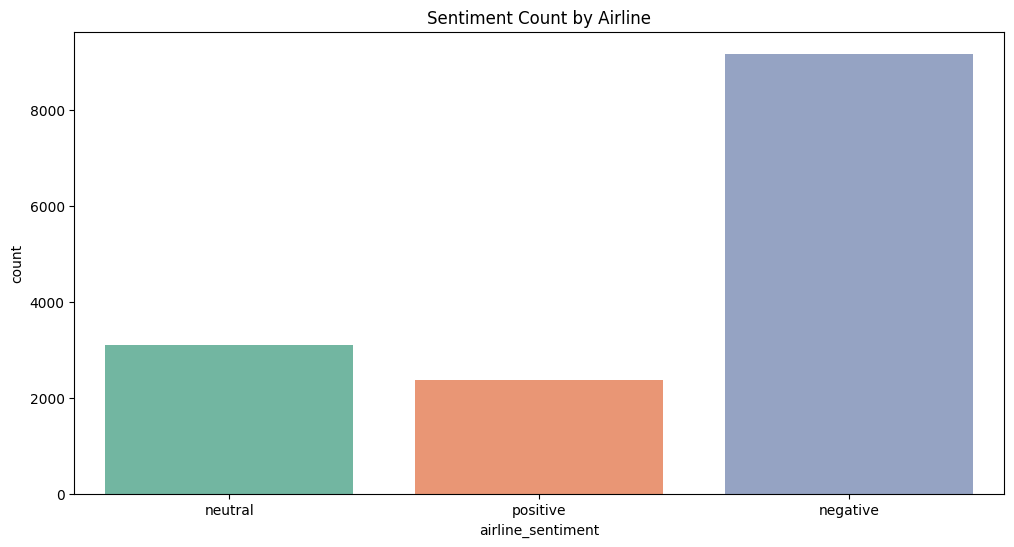

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='airline_sentiment', hue='airline_sentiment', palette='Set2')
plt.title("Sentiment Count by Airline")
plt.show()


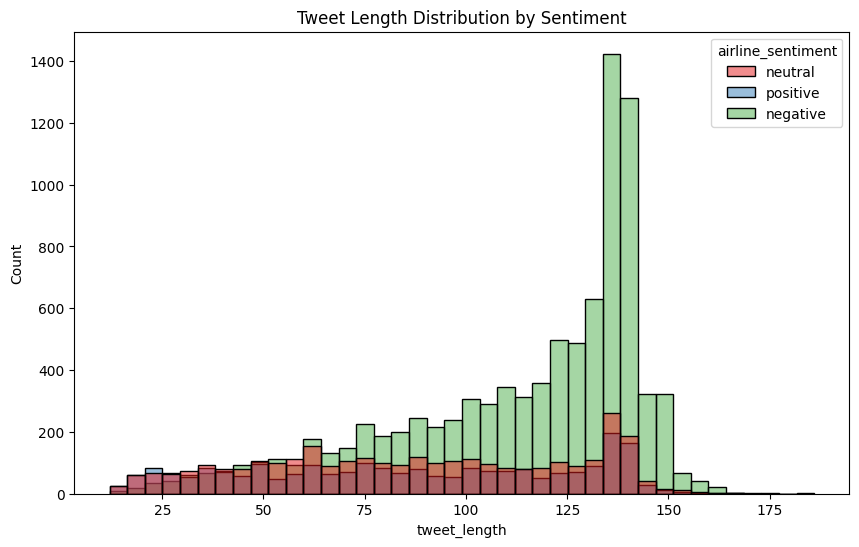

In [ ]:
df['tweet_length'] = df['text'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tweet_length', hue='airline_sentiment', bins=40, palette='Set1')
plt.title("Tweet Length Distribution by Sentiment")
plt.show()


In [ ]:
print(df.columns)


Index(['airline_sentiment', 'text', 'clean_text', 'label', 'tweet_length'], dtype='object')


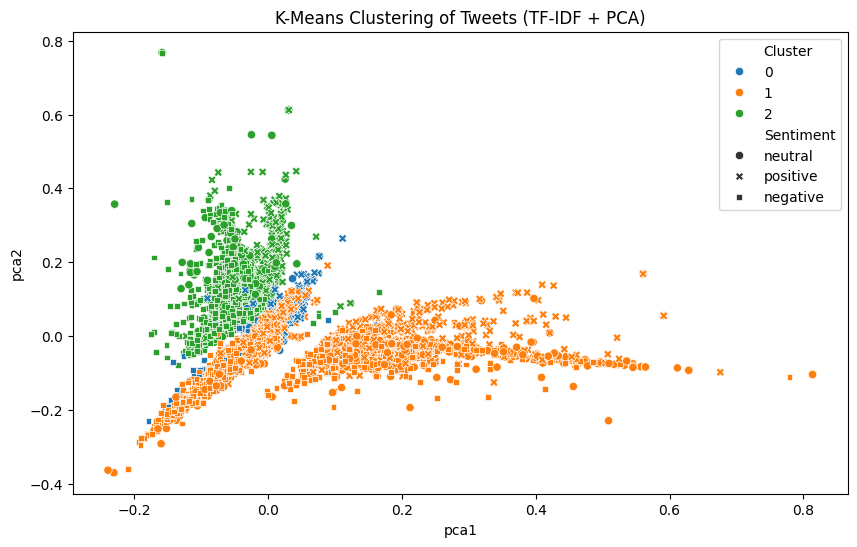

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(X)

# Create a new DataFrame
cluster_df = pd.DataFrame()
cluster_df['pca1'] = reduced[:, 0]
cluster_df['pca2'] = reduced[:, 1]
cluster_df['Cluster'] = clusters
cluster_df['Sentiment'] = df['airline_sentiment'].values

# Plot clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=cluster_df, x='pca1', y='pca2', hue='Cluster', style='Sentiment', palette='tab10')
plt.title("K-Means Clustering of Tweets (TF-IDF + PCA)")
plt.show()


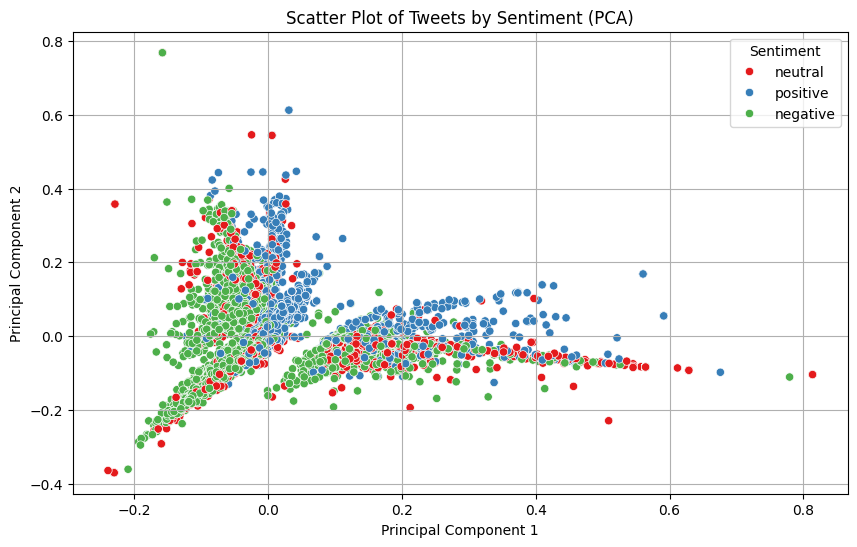

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a new DataFrame with reduced dimensions
pca_df = pd.DataFrame()
pca_df['PCA1'] = X_pca[:, 0]
pca_df['PCA2'] = X_pca[:, 1]
pca_df['Sentiment'] = y.values

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Sentiment', palette='Set1')
plt.title('Scatter Plot of Tweets by Sentiment (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [ ]:
# Count of each sentiment
sentiment_counts = df['airline_sentiment'].value_counts()
print(sentiment_counts)


airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


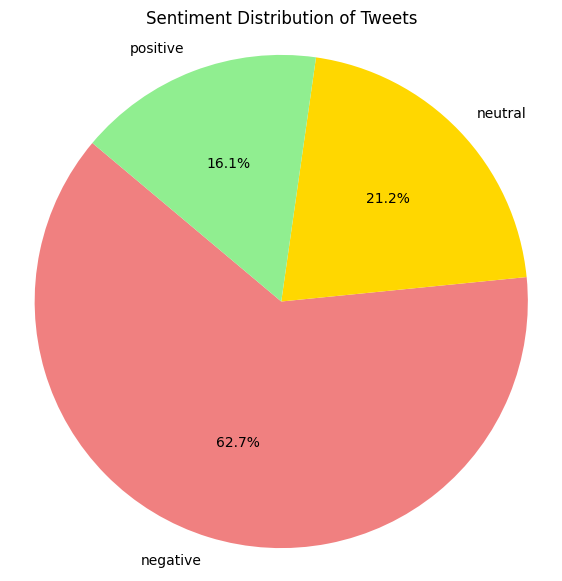

In [ ]:
# Count sentiments
sentiment_counts = df['airline_sentiment'].value_counts()

# Pie chart
plt.figure(figsize=(7, 7))
colors = ['lightcoral', 'gold', 'lightgreen']
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Sentiment Distribution of Tweets')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


In [ ]:
# Add a new column for tweet length
df['tweet_length'] = df['text'].str.len()

# Top 5 Positive Tweets
top_positive = df[df['airline_sentiment'] == 'positive'].sort_values(by='tweet_length', ascending=False).head(5)
print("Top 5 Positive Tweets:\n")
for i, tweet in enumerate(top_positive['text'], 1):
    print(f"{i}. {tweet}\n")

# Top 5 Negative Tweets
top_negative = df[df['airline_sentiment'] == 'negative'].sort_values(by='tweet_length', ascending=False).head(5)
print("Top 5 Negative Tweets:\n")
for i, tweet in enumerate(top_negative['text'], 1):
    print(f"{i}. {tweet}\n")


Top 5 Positive Tweets:

1. @USAirways Eyyyy! Cancelled Flightlations, Flight Booking Problemss, reFlight Booking Problemss, but y'all got me on the same flight out tonight (not tomorrow) &amp; the FC upgrade. Thx!

2. @SouthwestAir Thx to customer service rep ALEX for his patient help in reFlight Booking Problems a Cancelled Flighted flight and getting us where we have to be tmrw!

3. @USAirways thanks for helping with #reFlight Booking Problems #Cancelled Flightedflight Yvonne Anthony.  You will help us get to Tel Aviv on time.  #HappyFriday

4. @United Wanted to compliment ur phone agent Jeanette for reFlight Booking Problems RDU to SEA thru SFO after connecting flight thru EWR was Cancelled Flightled.

5. @SouthwestAir I love and appreciate the fact that you guys rarely Cancelled Flight flights and are on time, but I need a Cancelled Flightlation this time. 🙏

Top 5 Negative Tweets:

1. @USAirways Travelling from pwm to atl on Sunday That flight got Cancelled Flightled and my new fl

In [ ]:
!pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 11.0 MB/s eta 0:00:00


In [ ]:
import emoji, re

# If using emoji v1.x (older versions):
# df['emojis'] = df['text'].apply(lambda x: ''.join(c for c in x if c in emoji.UNICODE_EMOJI['en']))

# For emoji v2.x+ (latest versions):
df['emojis'] = df['text'].apply(lambda x: ''.join(c for c in x if emoji.is_emoji(c)))

df['hashtags'] = df['text'].apply(lambda x: re.findall(r"#(\w+)", x))


<ipython-input-38-82f37ec904f4>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['tweet_created'] = pd.date_range(start='2023-01-01', periods=len(df), freq='H')


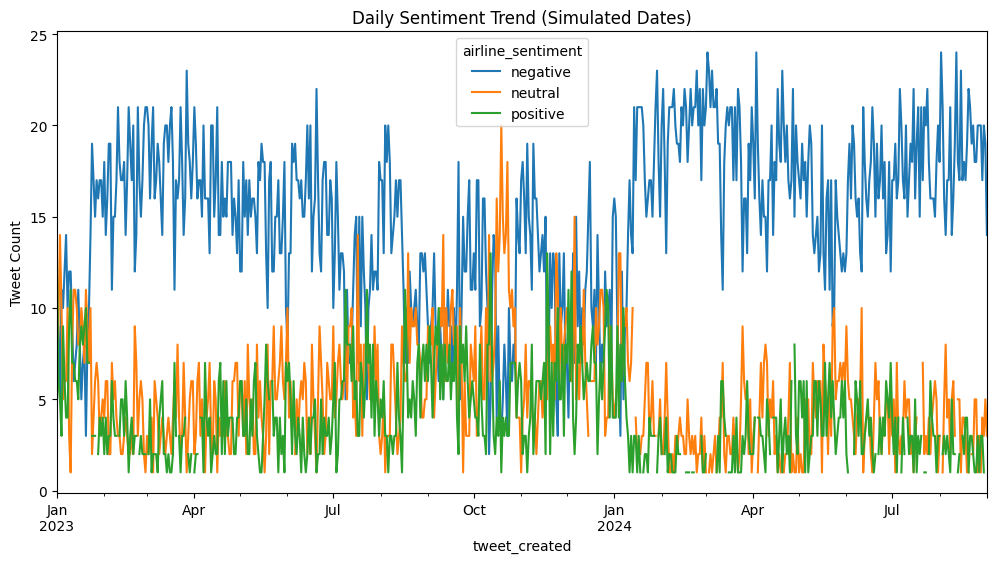

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulate a 'tweet_created' column with hourly intervals
df['tweet_created'] = pd.date_range(start='2023-01-01', periods=len(df), freq='H')

# Convert to datetime and set as index
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df.set_index('tweet_created', inplace=True)

# Resample and plot sentiment trends
df.resample('D')['airline_sentiment'].value_counts().unstack().plot(figsize=(12,6))
plt.title("Daily Sentiment Trend (Simulated Dates)")
plt.ylabel("Tweet Count")
plt.show()
